In [ ]:
import numpy as np
import cv2
import os
import random
import math
import time
import matplotlib.pyplot as plt

In [ ]:
#replace the path with the aimed folder (by duplicate the path from the left box)
os.chdir('/content/drive/Shareddrives/SmartCLT_DF2023/Scan1')

**Task 0: Fetch Images and Prepare for Processing**

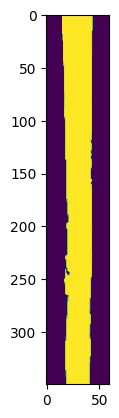

In [ ]:
imageset = []
imageset_highres=[]
num = 15
for i in range(1,num+1):
  if (i<10):
    image = cv2.imread('0'+str(i)+'_mask.jpg')
  else:
    image = cv2.imread(str(i)+'_mask.jpg')
  imageset_highres.append(image[:,:,0])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)/255
  image = cv2.resize(image, (image.shape[1]//10, image.shape[0]//10)) #downsize the image now for faster processing
  imageset.append(image)
  plt.imshow(image)

**Task 1: Align Two Images, Find Loss**

In [ ]:
def align_linear(image1, image2,addshift=0):

  zeros_column = np.zeros((image2.shape[0], image2.shape[1]))
  image_template = np.concatenate((zeros_column, image2), axis=1)
  image_width = image2.shape[1]


  loss_list = []
  values_0 = 1 # assign some value higher than zero
  image_shift = 0

  while values_0>0 and image_shift < image1.shape[0]:

    image_center1 = int(image1.shape[1]/2+image_shift)
    image_center2 = int(image1.shape[1]+image2.shape[1]/2)
    image_overlay1 = np.copy(image_template)
    image_overlay1[:, image_shift:image_shift+image_width] = image_overlay1[:, image_shift:image_shift+image_width]+image1
    between_region = image_overlay1[:,image_center1:image_center2]

    values_0 = np.sum(between_region == 0)
    values_2 = np.sum(between_region == 2)
    image_shift= image_shift + 1


  min_loss = values_2
  optimum_shift = image_shift+addshift
  image_overlay1 = np.copy(image_template)
  image_overlay1[:, optimum_shift:optimum_shift+image_width] = image_overlay1[:, optimum_shift:optimum_shift+image_width]+image1

  return min_loss, optimum_shift, image_overlay1

In [ ]:
def visualize_solution(imageset, solution):
      order_list = solution[0]
      orientations_list = solution[1]

      # rearrange images

      pairs = zip(imageset, order_list)
      sorted_pairs = sorted(pairs, key=lambda x: x[1])
      imageset_ordered = [pair[0] for pair in sorted_pairs]

      for i in range(len(orientations_list)):
        if orientations_list[i]==-1:
          imageset_ordered[i] = cv2.flip(imageset_ordered[i], 0)


      # compute a list of optimum shifts

      optimum_shifts = []
      optimum_shifts_running_value=0

      final_image = np.zeros([imageset_ordered[0].shape[0],imageset_ordered[0].shape[1]*len(imageset_ordered)])

      for i in range(len(imageset_ordered)-1):
        min_loss, optimum_shift, image_overlay1 = align_linear(imageset_ordered[i], imageset_ordered[i+1])
        optimum_shifts.append(optimum_shift)

      for i in range(len(imageset_ordered)):
        image_width = imageset_ordered[0].shape[1]
        basic_shift = image_width*i
        shift = sum(optimum_shifts[i:]) + basic_shift
        final_image[:, shift:shift+image_width] = final_image[:, shift:shift+image_width]+imageset_ordered[i]

      return final_image


In [ ]:
def visualize_solution2(imageset, solution):
      order_list = solution[0]
      orientations_list = solution[1]

      # rearrange images

      pairs = zip(imageset, order_list)
      sorted_pairs = sorted(pairs, key=lambda x: x[1])
      imageset_ordered = [pair[0] for pair in sorted_pairs]

      for i in range(len(orientations_list)):
        if orientations_list[i]==-1:
          imageset_ordered[i] = cv2.flip(imageset_ordered[i], 0)


      # compute a list of optimum shifts

      optimum_shifts = []
      optimum_shifts_running_value=0

      min_loss, optimum_shift, image_overlay1 = align_linear(imageset_ordered[0], imageset_ordered[1])
      current_axes = plt.axes()
      current_axes.get_xaxis().set_visible(False)
      current_axes.get_yaxis().set_visible(False)
      plt.imshow(image_overlay1,cmap="gray")
      plt.savefig("0.png",format="png",dpi=300)

      for i in range(len(imageset_ordered)-1):
        min_loss, optimum_shift, image_overlay1 = align_linear(imageset_ordered[i], imageset_ordered[i+1])
        m=str(i)
        current_axes = plt.axes()
        current_axes.get_xaxis().set_visible(False)
        current_axes.get_yaxis().set_visible(False)
        plt.imshow(image_overlay1,cmap="gray")
        plt.savefig(m+".png",format="png",dpi=300)

      return 0


In [ ]:
start_time = time.time()  # Record the start time
min_loss, optimum_shift, image_overlay1 = align_linear(imageset[0], imageset[1])
end_time = time.time()  # Record the end time

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", str(elapsed_time)[0:5], "seconds")

Elapsed time: 0.008 seconds


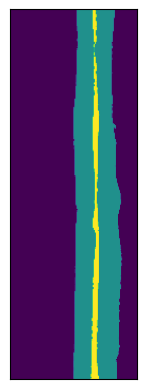

In [ ]:
current_axes = plt.axes()
current_axes.get_xaxis().set_visible(False)
current_axes.get_yaxis().set_visible(False)
plt.imshow(image_overlay1)
plt.savefig("a.png",format="png")

In [ ]:
zuzu=[1 for i in range(num)]
cucu=[0 for i in range(num)]
for i in range(num):
  cucu[i]=i
for i in range(num):
  zuzu[i]=1

In [ ]:
def swap_orientations(solution):
  order_list = solution[0]
  orientations_list = solution[1]
  selected_index = random.randint(0, len(orientations_list) - 1)
  orientations_list[selected_index] *= -1
  return order_list, orientations_list

def swap_orders(solution):
  order_list = solution[0]
  orientations_list = solution[1]
  index1, index2 = random.sample(range(len(order_list)), 2)
  order_list[index1], order_list[index2] = order_list[index2], order_list[index1]
  return order_list, orientations_list

order_list, orientations_list = swap_orientations([cucu, zuzu])
order_list, orientations_list


def generate_neighbor(solution):
# Randomly choose between operation 1 and operation 2
  chosen_operation = random.choice([swap_orders, swap_orientations])
# Execute the chosen operation
  order_list, orientations_list = chosen_operation(solution)

  return solution

In [ ]:
start_time = time.time()  # Record the start time
cucu1=cucu
a=cucu1[2]
cucu1[2]=cucu1[1]
cucu1[1]=a
[order_list, orientations_list] = generate_neighbor([cucu1, zuzu])
print(order_list, orientations_list)
end_time = time.time()  # Record the end time

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", str(elapsed_time)[0:5], "seconds")

[0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1]
Elapsed time: 0.001 seconds


In [ ]:
def objective_function(solution):

    order_list = solution[0]
    orientations_list = solution[1]

    # rearrange images

    pairs = zip(imageset, order_list)
    sorted_pairs = sorted(pairs, key=lambda x: x[1])
    imageset_ordered = [pair[0] for pair in sorted_pairs]

    for i in range(len(orientations_list)):
      if orientations_list[i]==-1:
        imageset_ordered[i] = cv2.flip(imageset_ordered[i], 0)

    # compute total loss
    total_loss = 0
    for j in range(len(imageset_ordered)-1):
      min_loss, optimum_shift, image_overlay1 = align_linear(imageset_ordered[j], imageset_ordered[j+1])
      total_loss = total_loss + min_loss



    return total_loss

In [ ]:
start_time = time.time()  # Record the start time
total_loss = objective_function([cucu, zuzu])
print(total_loss)
print(order_list, orientations_list)
end_time = time.time()  # Record the end time

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", str(elapsed_time)[0:5], "seconds")

19415
[0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1]
Elapsed time: 0.089 seconds


In [ ]:
def acceptance_probability(current_cost, new_cost, temperature):
    # Calculates the acceptance probability based on the cost difference and temperature
    if new_cost < current_cost:
        return 1.0
    else:
        return math.exp((current_cost - new_cost) / temperature)

def simulated_annealing(initial_solution, initial_temperature, cooling_rate, num_iterations):
    current_cost_list = []
    best_cost_list = []
    current_solution = initial_solution
    initial_loss = objective_function(initial_solution)
    best_solution = current_solution
    current_cost = objective_function(current_solution)
    best_cost = current_cost
    temperature = initial_temperature

    for _ in range(num_iterations):
        # Generate a new neighbor solution
        neighbor_solution = generate_neighbor(current_solution)

        # Calculate the cost of the neighbor solution
        neighbor_cost = objective_function(neighbor_solution)

        # Decide whether to accept the neighbor solution
        if acceptance_probability(current_cost, neighbor_cost, temperature) > random.random():
            current_solution = neighbor_solution
            current_cost = neighbor_cost

        # Update the best solution if necessary
        if neighbor_cost < best_cost:
            best_solution = neighbor_solution
            best_cost = neighbor_cost

        # Cool down the temperature
        temperature *= cooling_rate
        current_cost_list.append(current_cost)
        best_cost_list.append(best_cost)
        print(current_solution)
    return best_solution, best_cost, current_cost_list, best_cost_list


# Example usage
initial_solution = [cucu, zuzu]
initial_solution0 = [cucu, zuzu]

initial_temperature = 100.0
cooling_rate = 0.95
num_iterations = 500
initial_cost = objective_function(initial_solution0)

start_time = time.time()  # Record the start time
best_solution, best_cost, current_cost_list, best_cost_list = simulated_annealing(initial_solution, initial_temperature, cooling_rate, num_iterations)

end_time = time.time()  # Record the end time

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", str(elapsed_time)[0:5], "seconds")
print("Initial Solution:", initial_solution0)
print("Initial Cost:", initial_cost)
print("Best Solution:", best_solution)
print("Best Cost:", best_cost)

[[0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 12, 11, 10, 13, 14], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1]]
[[0, 2, 1, 3, 4, 5, 13, 7, 8, 9, 12, 11, 10, 6, 14], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1]]
[[0, 2, 1, 3, 4, 5, 13, 7, 8, 9, 12, 11, 10, 6, 14], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1]]
[[0, 2, 1, 9, 4, 5, 13, 7, 8, 3, 12, 11, 10, 6, 14], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1]]
[[0, 2, 1, 9, 8, 5, 13, 7, 4, 3, 12, 11, 10, 6, 14], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1]]
[[0, 2, 1, 3, 8, 5, 13, 7, 4, 9, 12, 11, 10, 6, 14], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1]]
[[0, 2, 1, 3, 8, 5, 13, 7, 4, 9, 12, 11, 10, 6, 14], [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1]]
[[0, 2, 1, 3, 8, 5, 13, 7, 4, 9, 12, 11, 10, 6, 14], [-1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1]]
[[0, 2, 1, 3, 8, 11, 13, 7, 4, 9, 12, 5, 10, 6, 14], [-1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1]]
[[0, 2, 1, 3, 8, 11, 13, 7, 4, 9, 12, 5, 10, 6, 14], [-1, 1, 1, 1, 1, 

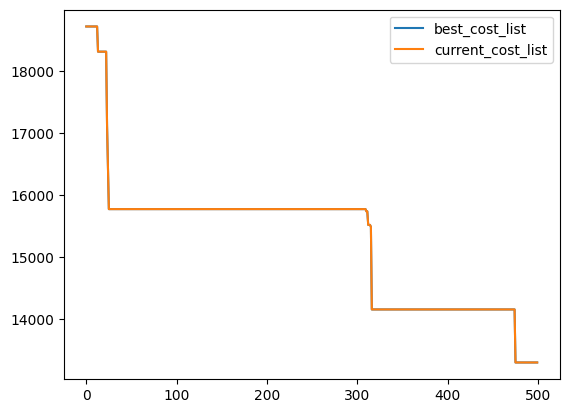

In [ ]:
import matplotlib.pyplot as plt

x = range(num_iterations)
plt.plot(x, best_cost_list, label='best_cost_list')
plt.plot(x, current_cost_list, label='current_cost_list')
plt.legend()
plt.show()

Text(0.5, 1.0, 'initial solution, cost: 19415')

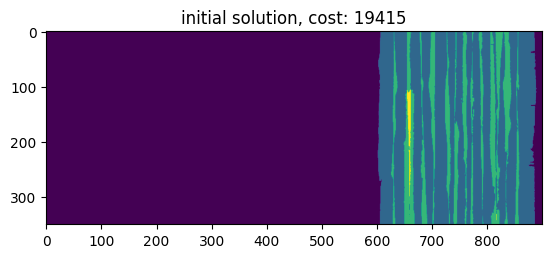

In [ ]:
final_image = visualize_solution(imageset, initial_solution0)
plt.imshow(final_image)
plt.title('initial solution, cost: '+str(initial_cost))

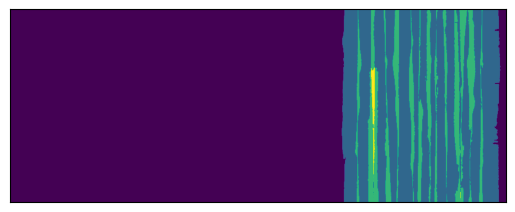

In [ ]:
final_image = visualize_solution(imageset, best_solution)
#plt.title('best solution, cost: '+str(best_cost))
current_axes = plt.axes()
current_axes.get_xaxis().set_visible(False)
current_axes.get_yaxis().set_visible(False)
plt.imshow(final_image)
plt.savefig("b.png",format="png",dpi=300)

In [ ]:
#visualize_solution2(imageset, best_solution)

In [ ]:
#replace the path with the aimed folder (by duplicate the path from the left box)
os.chdir('/content/drive/Shareddrives/SmartCLT_DF2023/T_Algorithm/OUT-CutLine/PNG')

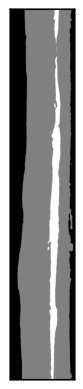

In [ ]:
solution1 = best_solution
for i in range(len(solution1[0])-1):
  m=str(i+1)
  log_id = solution1[0][i]+1
  #image1_ = imageset[int(solution1[0][i])]
  image1 = imageset_highres[int(solution1[0][i])]
  image2 = imageset_highres[int(solution1[0][i+1])]

  if int(solution1[1][i]) == -1:
    image1 = cv2.flip(image1,0)

  if int(solution1[1][i+1]) == -1:
    image2 = cv2.flip(image2,0)

  addshift=3
  min_loss, optimum_shift, image_overlay1 = align_linear(image1, image2)
  image_for_export = (image_overlay1[:,optimum_shift+addshift:optimum_shift+addshift+image1.shape[1]])
  if int(solution1[1][i]) == -1:
    image_for_export = cv2.flip(image_for_export,0)
  current_axes = plt.axes()
  current_axes.get_xaxis().set_visible(False)
  current_axes.get_yaxis().set_visible(False)
  plt.imshow(image_for_export,cmap="gray")
  plt.savefig(m+"_solution.png")
  #cv2.imwrite('solution_'+str(log_id)+'.png', image_for_export*150)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Create a dictionary with column names as keys and empty lists as values
data = {
    'NO': [],
    'rotation_det': [],
    'log_left': [],
    'log_right': []
}

# Populate the data dictionary from the solution list
for i in range(len(solution1[0])-1):
    data['NO'].append(solution1[0][i]+1)
    data['rotation_det'].append(solution1[1][i])

    left_index = (i - 1) % len(solution1[0])  # Wrap around to the end if i-1 goes out of range
    data['log_left'].append(solution1[0][left_index])

    right_index = (i + 1) % len(solution1[0])  # Wrap around to the beginning if i+1 goes out of range
    data['log_right'].append(solution1[0][right_index])

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

df

,NO,rotation_det,log_left,log_right
0,10,1,5,12
1,13,1,9,0
2,1,1,12,7
3,8,1,0,13
4,14,1,7,8
5,9,-1,13,2
6,3,-1,8,11
7,12,-1,2,6
8,7,-1,11,3
9,4,1,6,4
